In [15]:
import geopandas as gpd
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from fileinput import FileInput 

In [16]:
with FileInput("C:/Users/flavi/Travail/Switch-23/models/logs_file/lateness.csv", inplace=True, 
                   backup='.bak') as f: 
  
        # Iterating over every and changing 
        # the search_text with replace_text 
        # using the replace function 
        for line in f: 
            print(line.replace("],[", 
                               "\n"), end='')
            print(line.replace("]", 
                               ""), end='') 
            print(line.replace("[", 
                               ""), end='') 

In [27]:
road = gpd.read_file("C:/Users/flavi/Travail/Switch-23/includes/tests/roadImportance4/roads.shp")
gama_file = pd.read_csv("C:/Users/flavi/Travail/Switch-23/models/logs_file/lateness.csv")

In [28]:
gama_file

,ID,TopoId,distance,entry date,duration,mean speed,lateness
0,'Car12606','TRONROUT0000000073547959',2,'2023-10-12 06:57:00',1.0,8,0
1,'Car77856','TRONROUT0000000073488022',3,'2023-10-12 06:57:00',1.0,11,0
2,'Car17053','TRONROUT0000000073475276',9,'2023-10-12 06:57:00',1.0,33,0
3,'Car7305','TRONROUT0000002223815566',12,'2023-10-12 06:57:00',1.0,42,0
4,'Car126140','TRONROUT0000000319251884',5,'2023-10-12 06:57:00',1.0,18,0
...,...,...,...,...,...,...,...
55961796,'Car55262','TRONROUT0000002223614581',45,'2023-10-13 02:53:15',4.0,41,0
55961797,'Car55262','TRONROUT0000000073518672',23,'2023-10-13 02:53:19',2.0,42,0
55961798,'Car55262','TRONROUT0000002223614580',19,'2023-10-13 02:53:21',2.0,34,0
55961799,'Car55262','TRONROUT0000000073518969',20,'2023-10-13 02:53:23',2.0,36,0


In [32]:
traited_file = gama_file.groupby(['TopoId'],group_keys=False).agg({
                                        "distance": lambda x: list(np.unique(x))[0],\
                                        "duration": lambda x: np.mean(x),\
                                        "mean speed":lambda x: np.mean(x),\
                                        "lateness" : lambda x:np.max(x),\
                                        "ID" : lambda x:len(list(x))
                                    })
traited_file = traited_file.reset_index()
traited_file['TopoId'] = traited_file['TopoId'].map(lambda x : (x.replace("'","")))
traited_file = traited_file.rename(columns ={"ID":"frequentation"})
traited_file
#gama_file.to_csv("C:/Users/flavi/Travail/Switch-23/models/logs_file/meanMap.csv")

,TopoId,distance,duration,mean speed,lateness,frequentation
0,TRONROUT0000000073456159,7,1.000000,27.000000,0,308
1,TRONROUT0000000073456162,15,11.242319,22.199420,102,1725
2,TRONROUT0000000073456164,30,3.000000,36.000000,0,310
3,TRONROUT0000000073456167,13,2.055556,23.680400,4,3204
4,TRONROUT0000000073456168,129,101.892679,28.706784,642,5218
...,...,...,...,...,...,...
8157,TRONROUT0000002330723029,149,8.067065,66.617910,12,5025
8158,TRONROUT0000002330723030,176,10.000000,63.000000,0,2872
8159,TRONROUT0000002330723032,13,2.006479,22.970302,4,5556
8160,TRONROUT0000002330723033,25,4.136372,22.621658,8,5199


In [33]:
#pd.concat([gama_file,road], keys=['topoID','ID'])
roadMean = traited_file.merge(road, left_on='TopoId', right_on='ID')

In [34]:
roadMean = gpd.GeoDataFrame(roadMean)
roadMean

,TopoId,distance,duration,mean speed,lateness,frequentation,ID,NATURE,IMPORTANCE,NB_VOIES,SENS,VIT_MOY_VL,LARGEUR,VEHICULES,geometry
0,TRONROUT0000000073456159,7,1.000000,27.000000,0,308,TRONROUT0000000073456159,Route à 1 chaussée,3,3.0,Sens inverse,45,9,0,"LINESTRING Z (572182.500 6293613.500 151.500, ..."
1,TRONROUT0000000073456159,7,1.000000,27.000000,0,308,TRONROUT0000000073456159,Route à 1 chaussée,3,3.0,Sens direct,45,9,0,"LINESTRING Z (572182.500 6293613.500 151.500, ..."
2,TRONROUT0000000073456162,15,11.242319,22.199420,102,1725,TRONROUT0000000073456162,Route à 1 chaussée,3,3.0,Sens inverse,45,9,0,"LINESTRING Z (572068.000 6293497.800 139.500, ..."
3,TRONROUT0000000073456162,15,11.242319,22.199420,102,1725,TRONROUT0000000073456162,Route à 1 chaussée,3,3.0,Sens direct,45,9,0,"LINESTRING Z (572068.000 6293497.800 139.500, ..."
4,TRONROUT0000000073456164,30,3.000000,36.000000,0,310,TRONROUT0000000073456164,Route à 1 chaussée,3,3.0,Sens inverse,45,9,0,"LINESTRING Z (572177.300 6293608.100 151.000, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,TRONROUT0000002330723030,176,10.000000,63.000000,0,2872,TRONROUT0000002330723030,Route à 2 chaussées,3,2.0,Sens direct,70,5.5,0,"LINESTRING Z (571116.200 6271503.200 149.400, ..."
10664,TRONROUT0000002330723032,13,2.006479,22.970302,4,5556,TRONROUT0000002330723032,Rond-point,3,2.0,Sens direct,25,5,0 2,"LINESTRING Z (571075.200 6271505.900 149.100, ..."
10665,TRONROUT0000002330723033,25,4.136372,22.621658,8,5199,TRONROUT0000002330723033,Rond-point,3,2.0,Sens direct,25,5,0 2,"LINESTRING Z (571068.500 6271495.000 149.300, ..."
10666,TRONROUT0000002330723235,38,4.000000,35.000000,0,5596,TRONROUT0000002330723235,Route à 1 chaussée,3,4.0,Sens inverse,45,12,0,"LINESTRING Z (573809.500 6276996.600 142.600, ..."


In [35]:
roadMean.to_file("C:/Users/flavi/Travail/Switch-23/DataScript/OUT/meanMap.shp")

C:\Users\flavi\AppData\Local\Temp\ipykernel_23184\3543828862.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  roadMean.to_file("C:/Users/flavi/Travail/Switch-23/DataScript/OUT/meanMap.shp")


Text(0.5, 1.0, 'roads lateness (109440 individu, road importance 3)')

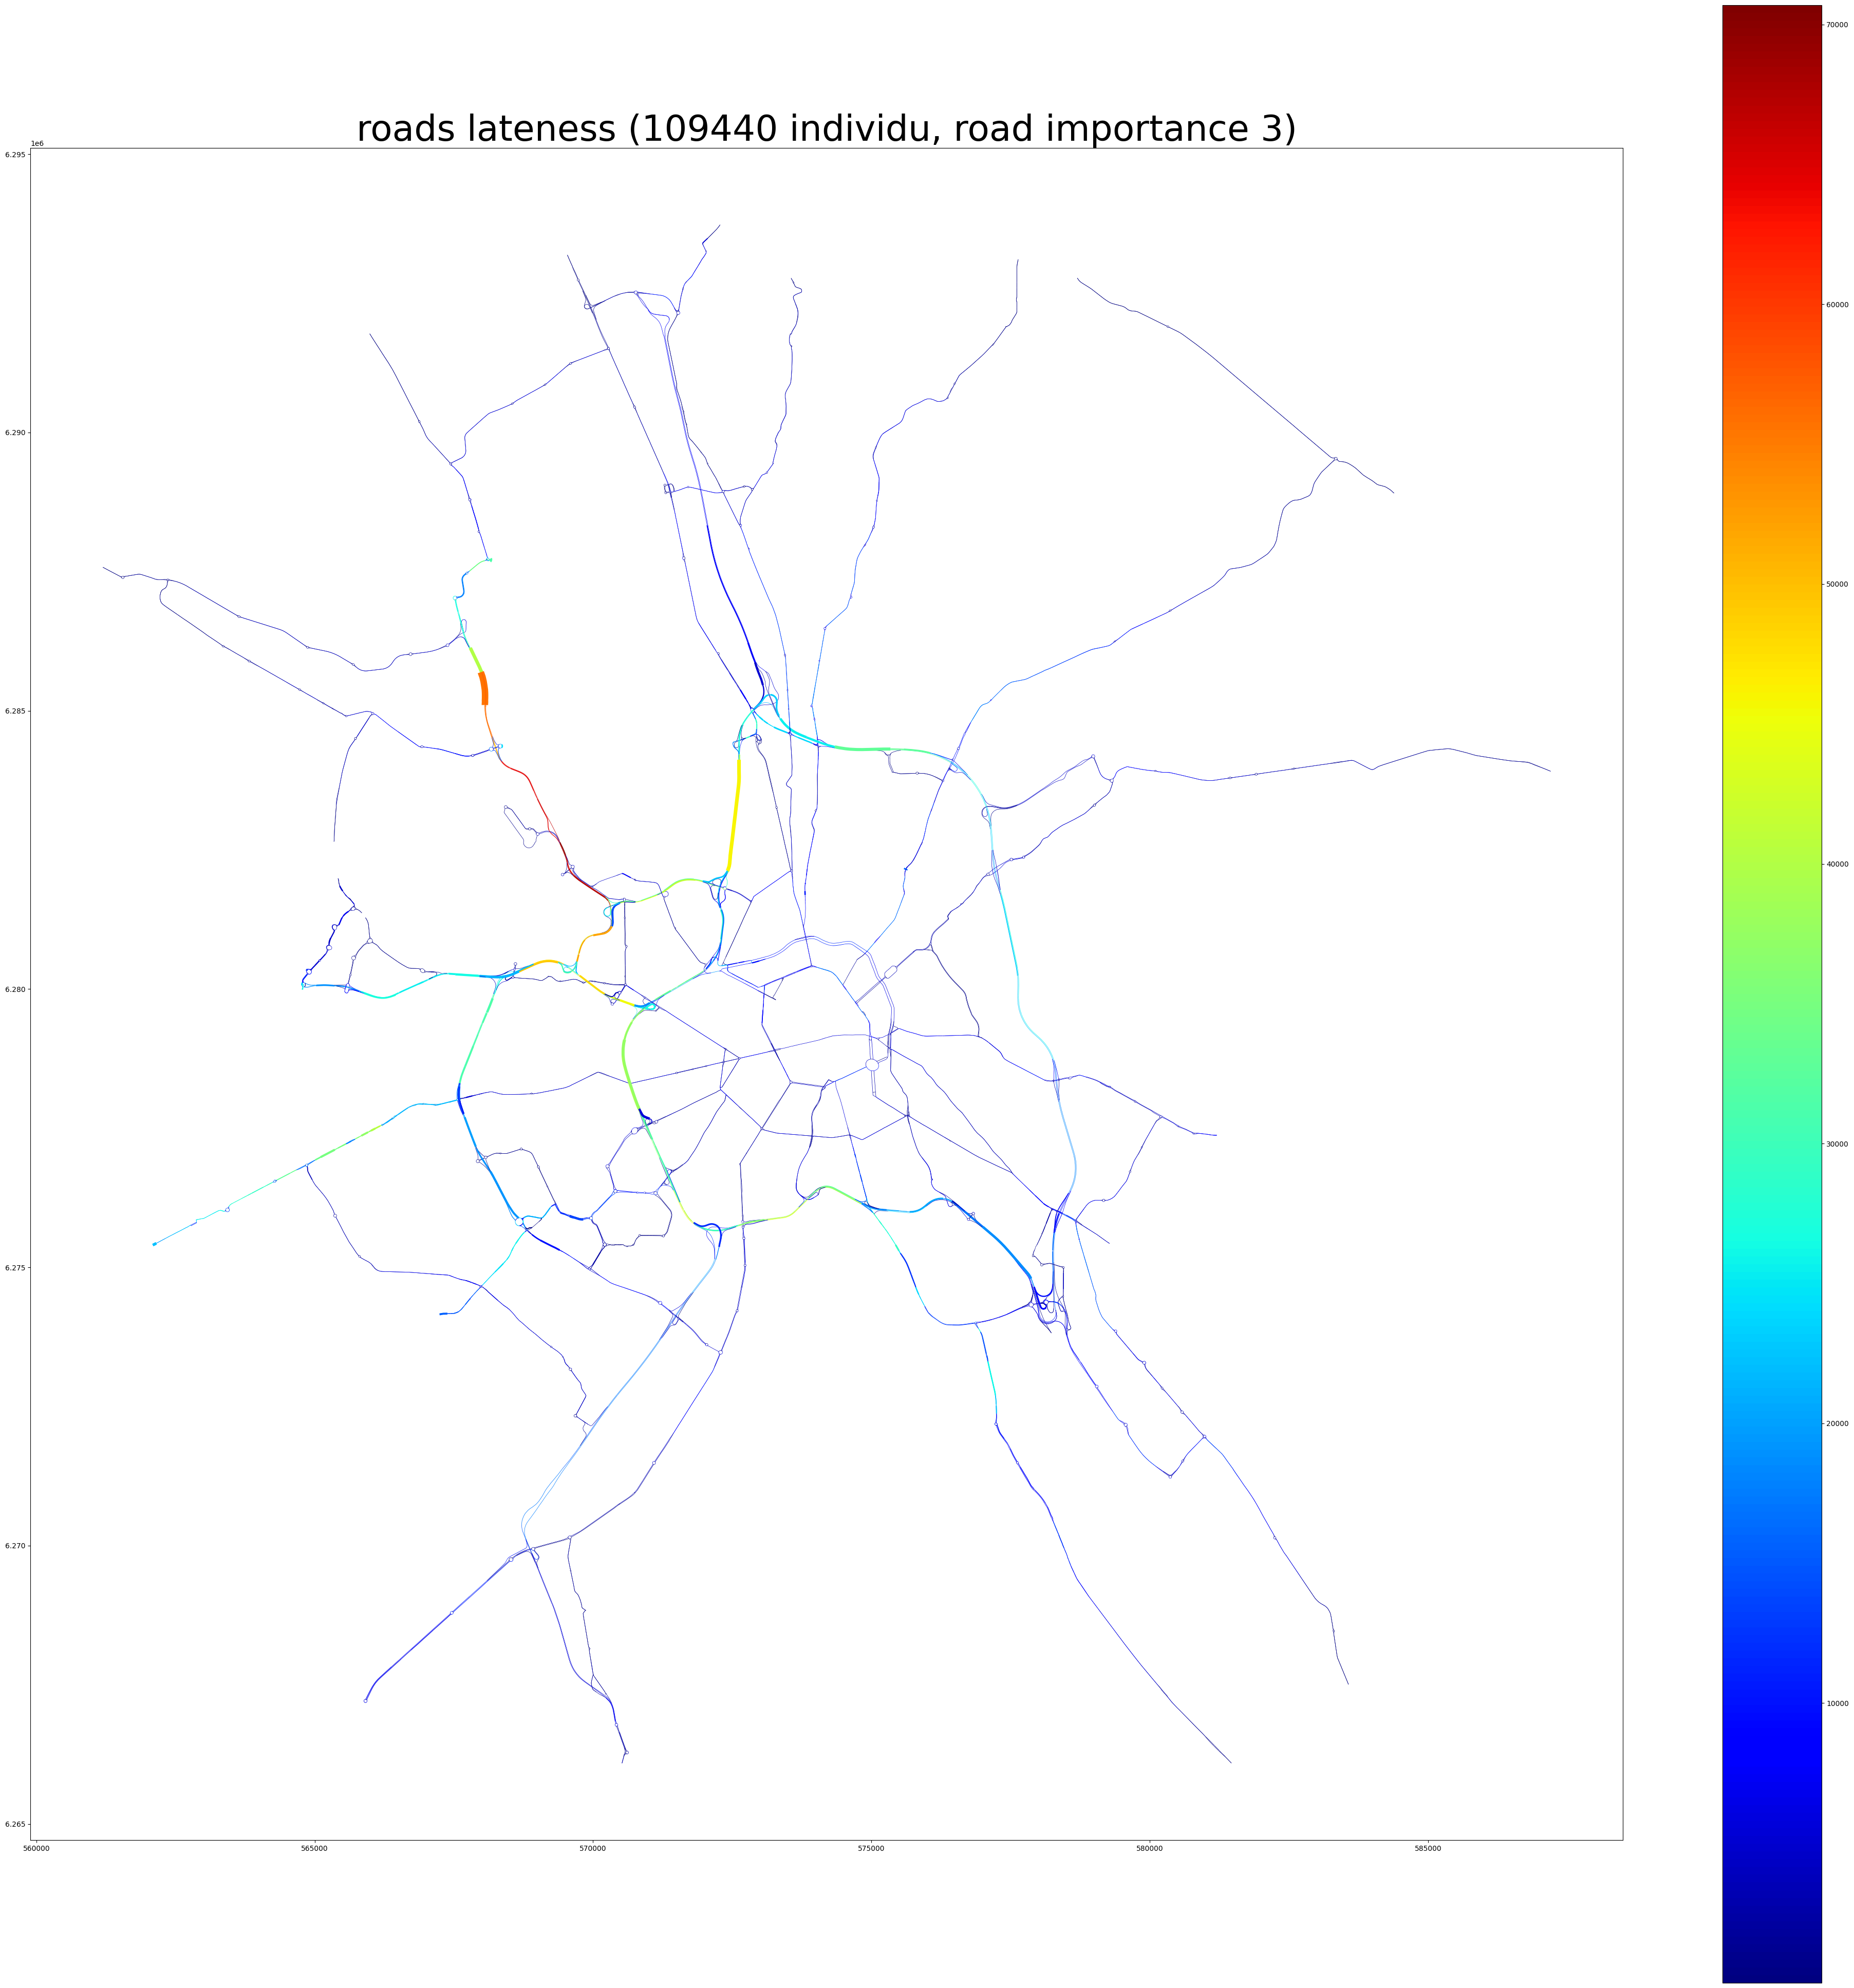

In [41]:
roadMean = gpd.read_file("C:/Users/flavi/Travail/Switch-23/DataScript/OUT/meanMap.shp")
heatmap = roadMean.plot(figsize = (50,50), column='frequentat', legend=True, cmap='jet', linewidth=(0.5+roadMean['lateness']/1000))
heatmap.set_title("roads lateness (109440 individu, road importance 3)",size='50')